In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_2 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_2.head()

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0


In [4]:

sinasc_2.shape

(27028, 3)

In [5]:
sinasc_2.IDADEPAI.isna().sum()

19421

In [6]:
19421/27028

0.7185511321592423

In [7]:
result = sinasc_2.dropna().groupby('munResNome').median()
result

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.0,28.5
Alto Alegre dos Parecis,25.0,28.0
Alto Paraíso,22.5,25.5
Alvorada D'Oeste,26.0,31.0
Ariquemes,28.0,29.0
Buritis,23.0,28.5
Cabixi,35.0,35.5
Cacaulândia,31.0,33.5
Cacoal,27.0,30.0


In [8]:
sinasc = sinasc_raw[[
    'IDADEMAE', 'SEXO', 'APGAR1', 'APGAR5', 'PESO', 'CONSULTAS', 'DTNASC',
    'GESTACAO', 'GRAVIDEZ', 'ESCMAE', 'IDADEPAI'
]].copy()

In [9]:
sinasc.SEXO.value_counts()

,count
SEXO,
Masculino,13886
Feminino,13138


In [10]:
sinasc.DTNASC.value_counts()

,count
DTNASC,
2019-04-10,116
2019-03-21,109
2019-09-25,108
2019-09-02,105
2019-12-04,104
...,...
2019-12-25,44
2019-02-09,44
2019-07-28,44


In [11]:
sinasc.groupby('DTNASC')['IDADEMAE'].count().sort_values(ascending=False)

,IDADEMAE
DTNASC,
2019-04-10,116
2019-03-21,109
2019-09-25,108
2019-09-02,105
2019-12-04,104
...,...
2019-07-28,44
2019-12-25,44
2019-02-09,44


In [12]:
sinasc.groupby('DTNASC', sort=False)['IDADEMAE'].mean()

,IDADEMAE
DTNASC,
2019-02-19,26.168539
2019-02-21,26.521277
2019-02-25,25.585366
2019-03-20,26.191919
2019-03-23,26.560000
...,...
2019-12-31,24.823529
2019-12-15,25.355556
2019-12-21,26.742857


In [13]:
sinasc.groupby('DTNASC')['IDADEMAE'].mean().sort_values(ascending=False)

,IDADEMAE
DTNASC,
2019-02-14,28.250000
2019-11-13,28.179487
2019-11-07,27.914634
2019-10-25,27.885246
2019-09-27,27.800000
...,...
2019-07-27,23.563636
2019-10-13,23.464286
2019-07-07,23.384615


In [14]:
sinasc.groupby('DTNASC')['IDADEMAE'].sum()

,IDADEMAE
DTNASC,
2019-01-01,1140
2019-01-02,1835
2019-01-03,2026
2019-01-04,1899
2019-01-05,1861
...,...
2019-12-27,2262
2019-12-28,1467
2019-12-29,1177


In [15]:
resultado = sinasc.groupby('DTNASC')['IDADEMAE'].mean()

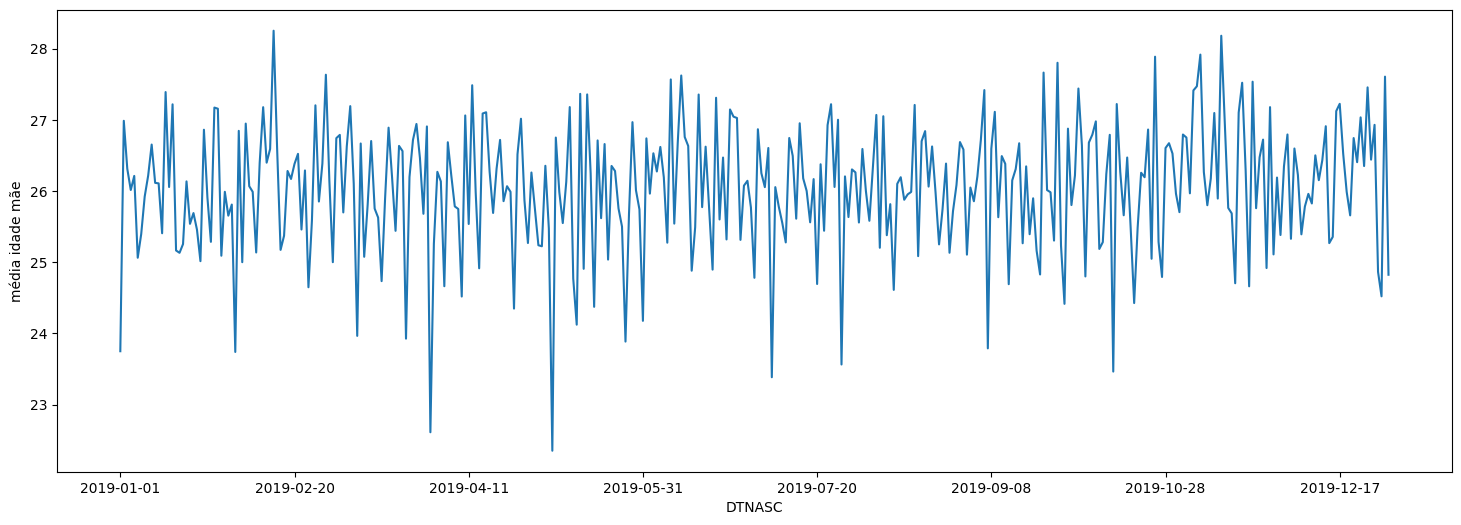

In [16]:
resultado.plot(figsize=[18, 6])
plt.ylabel('média idade mãe');

In [17]:

sinasc['SEXO'].value_counts()

,count
SEXO,
Masculino,13886
Feminino,13138


In [18]:
fem = sinasc[sinasc['SEXO'] == 'Feminino'].groupby('DTNASC')['IDADEMAE'].count()

In [19]:

masc = sinasc[sinasc['SEXO'] == 'Masculino'].groupby('DTNASC')['IDADEMAE'].count()

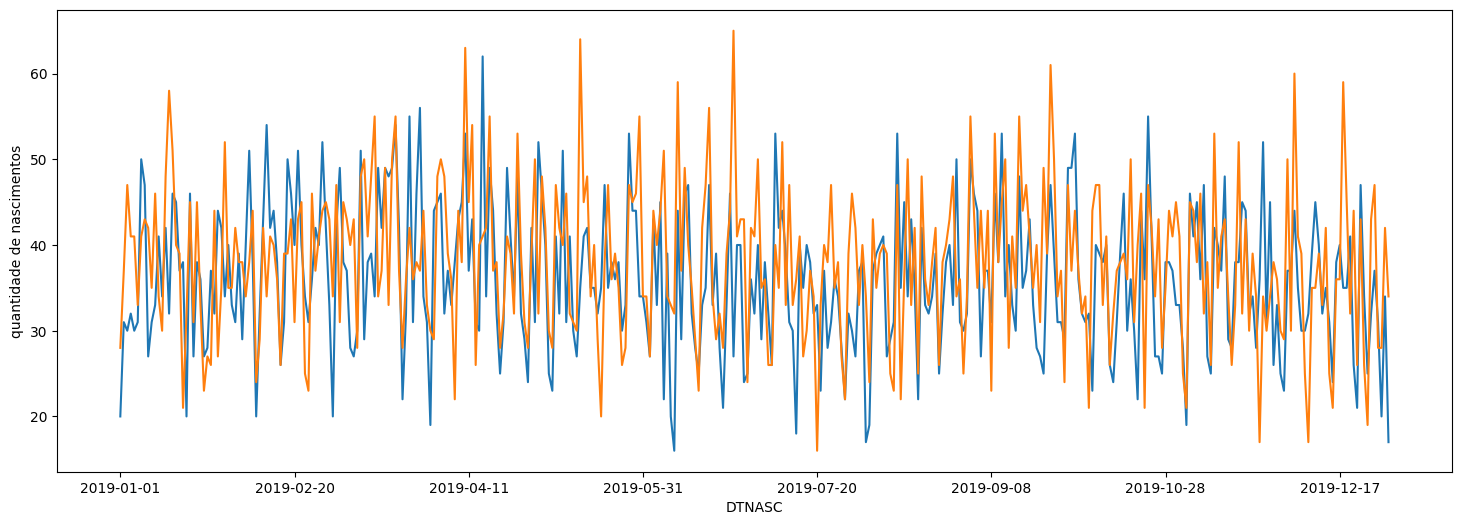

In [20]:
fem.plot(figsize=[18,6])
masc.plot()
plt.ylabel('quantidade de nascimentos');

In [21]:
sinasc.loc[:,'DTNASC'] = pd.to_datetime(sinasc['DTNASC'])

In [22]:
sinasc.set_index('DTNASC', inplace=True)

/usr/local/lib/python3.10/dist-packages/pandas/core/indexes/base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [23]:
#Monday=0, Sunday=6.
sinasc['DIADASEMANA'] = sinasc.index.dayofweek

In [24]:
sinasc.groupby('DIADASEMANA')['IDADEMAE'].count()

,IDADEMAE
DIADASEMANA,
0,4493
1,4024
2,4413
3,4138
4,3855
5,3183
6,2922


In [25]:

result = sinasc.groupby('DIADASEMANA')['IDADEMAE'].count()

In [26]:
result.index

Index([0, 1, 2, 3, 4, 5, 6], dtype='int32', name='DIADASEMANA')

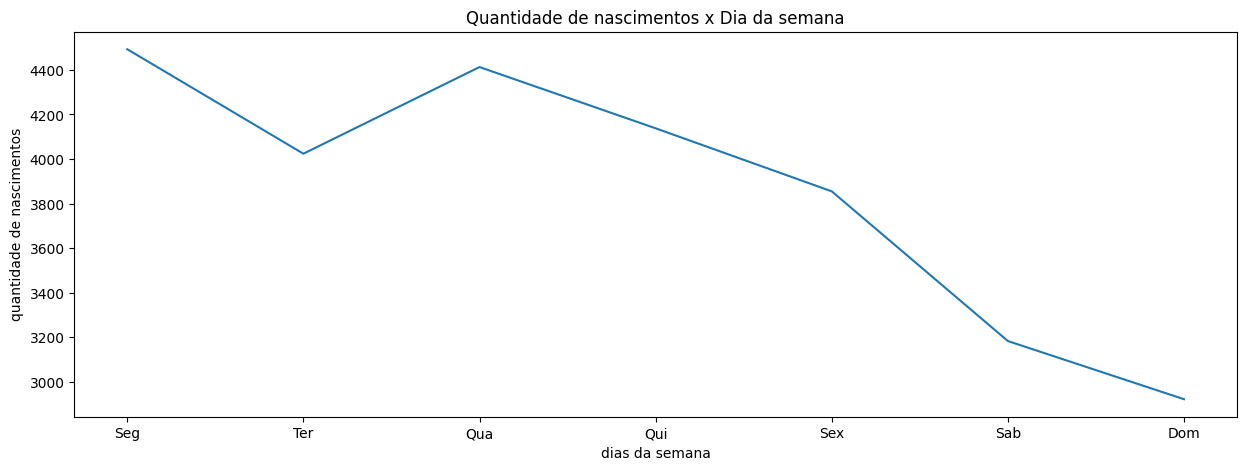

In [27]:
fig, ax = plt.subplots(figsize=[15,5])
result.plot()
ax.set_xticks(result.index)
ax.set_xticklabels(['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sab', 'Dom'])
plt.title('Quantidade de nascimentos x Dia da semana')
plt.xlabel('dias da semana')
plt.ylabel('quantidade de nascimentos');

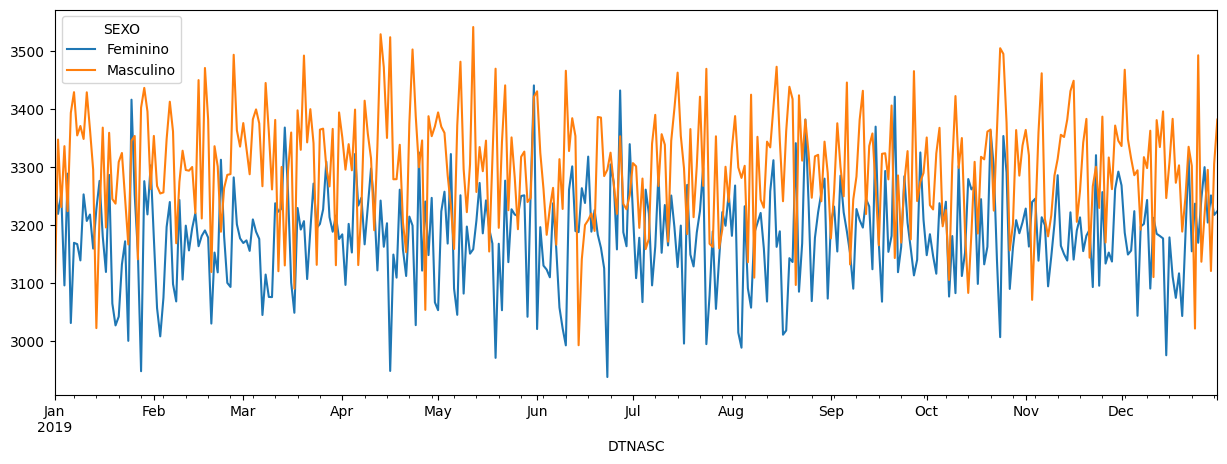

In [28]:

sinasc.groupby(['DTNASC', 'SEXO'])['PESO'].mean().unstack().plot(figsize=[15,5]);

<Axes: xlabel='ESCMAE'>

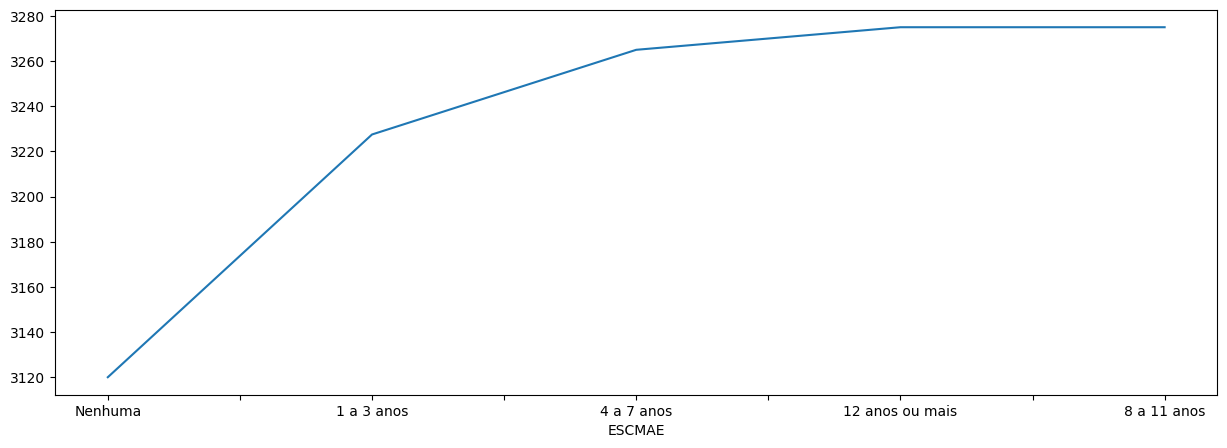

In [29]:

sinasc.groupby(['ESCMAE'])['PESO'].median().sort_values().plot(figsize=[15,5])